# 1 - 深度学习与深层神经网络

深度学习的**精确定义为：“一类通过多层非线性变换对高复杂性数据建模算法的集合”**

因此，多层神经网络有着2个非常重要的特性

* 多层

* 非线性

# 1.1 - 线性模型的局限性

在线性模型中，模型的输出为输入的加权和，假设一个模型的输出y和输入$x_i$满足以下关系，那么这么模型就是一个线性模型
$$y=\sum_{i}w_ix_i+b$$
其中$w_i，b\in R$为模型的参数，而一个线性模型的最大特点是任意线性模型的组合仍然还是线性模型

前向传播的计算公式为：$$a^{(1)}=xW^{(i)}$$,y=a^{(1)}W^{(2)}
其中x为输入，W为参数。整理一下上面的公式可以得到整个模型的输出为：
$$y=(xW^{(1)})W^{(2)}$$
根据矩阵乘法的结合律有：
$$y=x(W^{(1)}W^{(2)})=XW^{'}$$
而$W^{(1)}W^{(2)}$
根据矩阵乘法的结合律有：
$$y=x(W^{(1)}W^{(2)})=XW^{'}$$
而$W^{(1)}W^{(2)}$其实可以被表示为一个新的参数$W^{'}$:
$$W^{'}=x(W^{(1)}W^{(2)})=\begin{bmatrix}
 W_{1,1}^{(1)}&  W_{1,2}^{(1)}& W_{1,3}^{(1)}\\ 
W_{2,1}^{(1)} & W_{2,2}^{(1)} & W_{2,3}^{(1)}
\end{bmatrix}\begin{bmatrix}
 W_{1,1}^{(2)} \\ 
 W_{2,1}^{(2)} \\
 W_{3,1}^{(2)}
\end{bmatrix}=\begin{bmatrix}
 W_{1,1}^{(1)}W_{1,1}^{(2)}+ W_{1,2}^{(1)}W_{2,1}^{(2)}+ W_{1,3}^{(1)}W_{3,1}^{(2)} \\ 
  W_{2,1}^{(1)}W_{1,1}^{(2)}+ W_{2,2}^{(1)}W_{2,1}^{(2)}+ W_{2,3}^{(1)}W_{3,1}^{(2)}  
\end{bmatrix}=\begin{bmatrix}
 W_1^{'} \\ 
  W_2^{'}
\end{bmatrix}$$

其中$W^{'}$是新的参数。整个前向传播的算法完全符合线性模型的定义。因此虽然这个神经网络有两层，但是它和单层的神经网络并没有什么区别。因此如果都是线性变换，任意层的全连接神经网络和单层神经网络模型的表达能力没有任何区别。这就是线性模型最大的局限性，也是为什么深度学习要强调非线性。

虽然在解决线性分类问题时，线性模型可以很好的解决问题。

(TensorFlow游乐场http://playground.tensorflow.org 是一个通过网页浏览器就可以训练的简单神经网络并实现了可视化训练过程的工具。)

如图，在TensorFlow游乐场中，经过506次迭代之后线性模型很好的画出了二分问题的分界线，并且损失函数为0

![2018-11-05_143956.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-1.png?raw=true)

但是对于非线性数据，线性模型就不能很好的把数据分类，经过507次迭代后仍然不能画出分界线，并且损失函数的值很高

![2018-11-05_144135.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-2.png?raw=true)

当我们将线性的激活函数换成非线性的ReLu函数时，经过507次迭代后，画出的分界线明显好于线性模型，并且损失函数的值只有0.005。

![2018-11-05_144422.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-3.png?raw=true)


# 1.2 - 激活函数实现去线性化

如果将每一个神经元（也就是神经网络中的节点）的输出通过一个非线性函数，那么整个神经网络也就不再是线性了。这个非线性函数就是激活函数![QQ%E5%9B%BE%E7%89%8720181105141902.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0.png?raw=true)
使用激活函数主要有两个改变
* 新的公式中添加了偏置项（bias）偏置项是神经网络中非常常用的一种结构

* 每个节点的输出在加权和的基础上海做了一个非线性变换

下图是几种常用的非线性激活函数的函数图像：
![QQ%E5%9B%BE%E7%89%8720181105142347.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B02.png?raw=true)

目前TensorFlow提供了7种不同的线性激活函数
* tf.nn.relu
* tf.sigmoid
* tf.tanh
是其中比较常用的几个。当然TensorFlow也支持自己定义的激活函数

使用激活函数的前向传播算法代码如下：
```
a = tf.nn.relu(tf.matmul(x,w1)+biases1)
y = tf.nn.relu(tf.matmul(a,w2)+biases2)
```
# 2 - 损失函数

## 2.1 - 分类问题的经典损失函数

分类问题和回归问题是监督学习的两大种类。分类问题是将不同的样本分到实现定义好的类别中。如判断一个零件是否合格的问题是一个二分类问题，而手写体数字识别问题可以被归纳为一个十分类问题。

之前在解决判断零件是否合格的二分类问题时，设立了一个0.5的阈值，凡是输出大于0.5的样本都认为是合格的，小于0.5的则是不合格的。然而这种做法在实际问题解决的过程中一般不会这么处理

通过神经网络解决多分类问题最常用的方法是设置n个输出节点，其中n为类别的个数。对于每一个样例，神经网络可以得到的一个n维数组作为输出结果。数组中的每一个维度（也就是每一个输出节点）对应一个类别。以识别数字1位例，神经网络模型的输出结果越接近$[1,0,0,0,0,0,0,0,0,0]$越好。那么如何判断一个输出向量和期望的向量有多接近呢？

**交叉熵（cross entropy）**是常用的评判方法之一，交叉熵刻画了两个概率分布之间的距离，它是分类问题中使用比较广的一种损失函数
给定两个概率分布p和q，通过q来表示p的交叉熵为：
$$H(p,q)=-\sum_{x}p(x)logq(x)$$
注意交叉熵刻画的是两个概率分布之间的距离，然而神经网络的输出却不一定是一个概率分布，概率分布刻画了不同事件发生的概率。当时间总数是有限的情况下，概率分布函数p(X=x)满足：
$$\forall x p(X=x)\in [0,1]且\sum_{x}p(X=x)=1$$
如何将神经网络前向传播得到的结果也变成概率分布呢？Softmax回归就是一个非常常用的方法。

Softmax回归本身可以作为一个学习算法来优化分类结果，但在TensorFlow中，Softmax回归的参数被去掉了，它只是一层额外的处理层，将神经网络的输出编程了一个概率分布。如图展示了加上Softmax回归的神经网络结构图
![QQ%E5%9B%BE%E7%89%8720181105151956.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-softmax.png?raw=true)

假设原始的神经网络输出为$y_1,y_2,\dots,y_n$，那么经过Softmax回归处理之后的输出为：

$$softmax(y)_i=y_i^{'}=\frac{e^{y_i}}{\sum_{j=1}^ne^{y_j}}$$

假设有一个三分类问题，某个样例的正确答案是（1,0,0）。某模型经过Softmax回归之后的预测答案是（0.5,0.4,0.1）那么这个预测和正确答案之间的交叉熵为：
$$H((1,0,0),(0.5,0.4,0.1))=-(1*log0.5+0*log0.4+0*log0.1)\approx 0.3$$

如果另外一个模型的预测是（0.8,0.1,0.1），那么这个预测值和真是值之间的交叉熵是：
$$H((1,0,0),(0.8,0.1,0.1))=-(1*log0.8+0*log0.1+0*log0.1)\approx 0.1$$

从直观上可以很容易的指导第二个预测答案要优于第一个，通过交叉熵计算得到的结果也是一致的（第二个交叉熵的值更小）

其代码实现如下：
```
cross_entropy = -tf.reduce_mean(y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
```
其中y_代表正确结果，y代表预测结果。通过tf.clip_by_value函数可以将一个张量中的数值限制在一个范围之内，这样可以避免一些运算错误（比如log0是无效的）下面给出了使用tf.clip_by_value的简单样例。
```
v = tf.constant([1.0,2.0,3.0],[4.0,5.0,6.0])
print(tf.clip_by_value(v,2.5,4.5).eval()
#输出[[2.5,2.5,3],[4,4.5,4.5]]
```
因为交叉熵一般会与softmax回归一起使用，所以TensorFlow对这个功能进行了统一封装，并提供了tf.nn.softmax_cross_entropy_with_logits函数。比如可以直接通过下面代码来实现softmax回归之后的交叉熵损失函数：
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(y,y_)

其中y代表了原始神经网络的输出结果，而y_给出了标准答案。这样通过一个命令就可以得到使用了Softmax回归之后的交叉熵。

## 2.2 - 回归问题的损失函数

与分类问题不同，回归问题解决的是对具体数值的预测。比如房价预测、销量预测等都是回归问题。这些问题需要预测的不是一个事先定义好的类别，而是一个任意实数。解决回归问题的神经网络一般只有一个输出节点，这个界定啊的输出值就是预测值。对于回归问题，最长用的损失函数是均方差误差（MSE,mean squared error）。它的定义如下：

$$MSE(y,y^{'})=\frac{\sum_{i=1}^n(y_i-y_i^{'})^2}{n}$$

其中$y_i$为一个batch中第i个数据的正确答案，而$y_i^{'}$为神经网络给出的预测值。以下代码展示了如何通过TensorFlow实现均方差损失函数：
$$mse=tf.reduce_mean(tf.square(y_-y))$$
其中y代表了神经网络的输出答案，y_代表了标准答案。

## 2.3 - 自定义损失函数

TensorFlow不仅支持经典的损失函数，还也优化任意的自定义损失函数。
如以预测商品销量问题为例：
 
 在预测商品销量时，因为利润和成本代价不同，少预测一个的代价为10元，多预测一个的代价为1元，因此均方差代价函数无法最大化预期的利润。
 
 所以可以自定义损失函数：
 $$Loss(y,y^{'})=\sum_{i=1}^nf(y_i,y_i^{'}),f(x,y)=\begin{cases}
 10(x-y)& \text{ if } x>y \\ 
 (y-x)& \text{ if } x\leq y 
\end{cases}$$

在TensorFlow中，可以通过以下代码来实现这个损失函数。
```
loss=tf.reduce_sum(tf.where(tf.greater(v1,v2),(v1-v2)*a,(v2-v1)*b))
```
* tf.greater：输入两个张量，比较大小，并返回True or false 

* tf.where:有三个参数，第一个为选择条件根据，当选择条件为True时，选择第二个参数的值，为False时，返回的是第三个参数的值

以下是这两个函数的使用例子：

In [1]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
v1 = tf.constant([1,2,3,4])

v2 = tf.constant([4,3,2,1])

sess = tf.InteractiveSession()
print(tf.greater(v1,v2).eval())

print(tf.where(tf.greater(v1,v2),v1,v2).eval())

sess.close()

[False False  True  True]
[4 3 3 4]


在定义了损失函数之后，下面将通过一个简单的神经网络程序来讲解损失函数对模型训练结果的影响，下面市县一个拥有两个输入节点，一个输出节点，没有隐藏层的神经网络。

In [3]:
import tensorflow as tf
from numpy.random import RandomState
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

batch_size = 8
#两个输入节点
x = tf.placeholder(tf.float32, shape=(None,2), name='x-input')
#回归问题一般只有一个输出节点
y_ = tf.placeholder(tf.float32, shape=(None,1), name='y-input')

#定义了一个单层的神经网络前向传播的过程，这里就是简单加权和
w1 = tf.Variable(tf.random_normal([2,1],stddev=1,seed=1))
y = tf.matmul(x,w1)

#定义预测多了和预测少了的成本
loss_less = 10
loss_more = 1
loss = tf.reduce_sum(tf.where(tf.greater(y,y_),(y-y_)*loss_more,(y_-y)*loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

#通过随机数生成了一个模拟数据集
rdm = RandomState(1)
dataset_size = 128
X = rdm.rand(dataset_size,2)
#设置回归的正确值为两个输入的和加入一个随机量，之所以要加上一个随机量是为了
#加入不可预测的噪音，这里的噪音设置为-0.05~0.05的随机数

Y = [[x1 + x2 + rdm.rand()/10.0-0.05] for (x1,x2) in X]

#训练神经网络
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i * batch_size)% dataset_size
        end = min(start+batch_size,dataset_size)
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
    print("w1=",sess.run(w1))

w1= [[1.019347 ]
 [1.0428089]]


# 3 - 神经网络优化算法

**反向传播算法（backpropagation）**和**梯度下降算法(gradient decent)**是训练神经网络的核心算法。

（有关梯度下降和反向传播的具体原理推导详见学习笔记1、3）


* 只有当损失函数为凸函数时，梯度下降算法才能保证达到全局最优解

* 批量梯度下降计算时间太长。为了加速训练过程，可以使用随机梯度下降算法（stochastic gradient descnet）

但是随机梯度下降算法每次优化的只是某一条数据上的损失函数，所以它的问题也非常明显：在某一条数据上损失函数更小并不代表在全部数据上损失函数更小，有可能连局部最优都无法达到

因此，在实际应用中一般采用这两个算法的折中——**每次计算计算一小部分训练数据的损失函数。**这一小部分数据被称之为一个batch。通过矩阵运算，每次在一个batch上优化神经网络的参数并不会比单个数据慢太多。

另一方面，每次使用一个batch可以大大减少收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。

因此在本文样例使用中，神经网络的训练大致遵循以下过程：
```
batch_size = n

#每次读取一小部分数据作为当前的训练数据来执行反向传播算法。
x = tf.placeholder(tf.float32,shape=(batch_size,2),name='x-input')
y_ = tf.placeholder(tf.float32,shape=(batch_size,1),name='y-input')

#定义神经网络结构和优化算法
loss = ...
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

#训练神经网络
with tf.Session() as sess:
    #参数初始化
    ...
    #迭代的更新参数
    for i in range (STEPS):
        #准备batch_size个训练数据。一般将所有训练数据打乱之后再选取可以得到更好的优化效果
        current_X,current_Y= ...
        sess_run(train_step,feed_dict={x:current_X,y:current_Y})
```
# 4 - 神经网络进一步优化

## 4.1 - 学习速率的设置

当学习速率过大时，参数将来回波动不会收敛到极小值，相反当学习速率过小时，虽然能保证收敛性，但是这回大大降低优化速率。

为了解决学习率的问题，TensorFlow提供了一种更加灵活的学习率设置方式——指数衰减法。**tf.train.exponential_decay**函数实现了指数衰减学习率。通过这个函数，可以先使用较大的学习率来快速得到一个比较优的解，然后随着迭代的继续逐步减小学习率，使得模型在训练后期更加稳定。

其示范代码：
```
global_step = tf.Variable(0)

#通过exponential_decay函数生成学习速率。
learning_rate = tf.train.exponential_decay(0.1,global_step,100,0.96,staircase=True)

#如果staircase=True下降曲线为阶梯函数
#Flase则为连续衰减函数


```

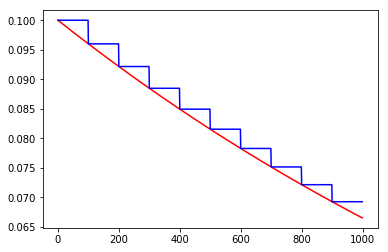

In [4]:
import tensorflow as tf;  
import numpy as np;  
import matplotlib.pyplot as plt;  
  
learning_rate = 0.1  
decay_rate = 0.96  
global_steps = 1000  
decay_steps = 100  
  
global_ = tf.Variable(tf.constant(0))  
c = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=True)  
d = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=False)  
  
T_C = []  
F_D = []  
  
with tf.Session() as sess:  
    for i in range(global_steps):  
        T_c = sess.run(c,feed_dict={global_: i})  
        T_C.append(T_c)  
        F_d = sess.run(d,feed_dict={global_: i})  
        F_D.append(F_d)  
  
  
plt.figure(1)  
plt.plot(range(global_steps), F_D, 'r-')  
plt.plot(range(global_steps), T_C, 'b-')  
      
plt.show()  

## 4.2 - 过拟合问题

过拟合问题是指模型对数据过度拟合噪音而不能很好的预测数据如下图所示
![2018-11-07_161556.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/17-%E8%BF%87%E6%8B%9F%E5%90%88.png?raw=true)

为了避免过拟合问题，一个非常常用的方法是正则化（regularization）。正则化的思想就是在损失函数中加入刻画模型复杂程度的指标。

假设损失函数为$j(\theta)$,那么正则化优化的是$J(\theta)+\lambda R(w)$。其中$R(W)$刻画的是模型的复杂程度，而$\lambda$表示模型复杂损失在总损失中的比例

常用的刻画模型复杂度的函数R(w)有两种:

** L1正则化：$R(w)=\sum_{i}|w_i|$**

** L2正则化：$R(w)=\sum_{i}|w_i^2|$**

两种正则化的基本思想都是通过限制权重的大小。但是也有很大的区别，首先L1会让参数变得更稀疏，可以达到类似特征选取的功能。其次，L1正则化的计算公式不可导，因为在优化时需要计算损失函数的偏导数，所以对含有L2正则化损失函数的优化要更简介。优化带L1正则化的损失函数要更加复杂。

在实践中，也可以将L1和L2正则化同时使用：
** $$R(w)=\sum_i\alpha|w_i|+(1-\alpha)w_i^2$$ **

以下代码给出了一个简单的带L2正则化的损失函数定义：
```
w = tf.Variable(tf.random_normal([2,1],stddev=1,seed=1))
y = tf.matmul(x,w)

loss = tf.reduce_mean(tf.square(y_-y))+tf.contrib.layers.l2_regularizer(lambda)(w)
```

在上面的程序中，loss为定义的损失函数，它由两个部分组成。第一个部分是**tf.reduce_mean**均方差损失函数，它刻画了模型在训练数据上的表现。第二个部分就是正则化，它模型过度拟合数据中的随机噪音。lambda参数表示了正则化的权重，也就是公式$J(\theta)+\lambda R(w)$中的$\lambda$。$w$为需要计算正则化损失的参数。TensorFlow提供了**tf.contrib.layers.l2_regularizer函数**，这个函数可以计算一个给定参数的L2正则化项的值。

类似的，**tf.contib.layers.l1_regularizer**可以计算L1正则化的值

但当神经网络的参数增多之后，这样的方式可能导致损失函数loss的定义很长，可读性差且容易出错。但更主要的是，当网络结构复杂之后网络结构的部分和计算损失函数的部分可能不在同一个函数中，这样通过变量这种方式计算损失函数就不方便了。为了解决这个问题，可以使用TensorFlow中提供的**集合（collection）。**

它可以在计算图（tf.Graph）中保存一组实体（比如张量）。一下代码给出了通过集合计算一个5层神经网络带L2正则化的损失函数的计算方法。

In [7]:
import tensorflow as tf
from numpy.random import RandomState
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 获得一层神经网络边上的数量，并将这个权重L2正则化损失加入名称为‘losses’的集合中
def get_weight(shape,Lambda):
    #生成一个变量
    var = tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    # add_to_collection函数将这个新生成变量的L2正咋花损失项加入集合
    #这个函数的第一个参数'losses'是这个集合的名字，第二个参数是要加入这个集合的内容
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(Lambda)(var))
    #返回生成的变量。
    return var

x = tf.placeholder(tf.float32,shape=(None,2))
y_ = tf.placeholder(tf.float32,shape=(None,1))
batch_size = 8
#定义了每一层网络中节点的个数。
layer_dimension = [2,10,10,10,1]
# 神经网络的层数
n_layers = len(layer_dimension)

#这个变量维护前向传播时最深层的节点，开始的时候就是输入层。
cur_layer = x
#当前层的节点个数
in_dimension = layer_dimension[0]

#通过一个循环来生成5层全连接的神经网络结构。
for i in range(1,n_layers):
    # layer_dimension[i]为下一层的节点个数
    out_dimension = layer_dimension[i]
    # 生成当前层中权重的变量，并将这个变量的L2正则化损失加入计算图上的集合。
    weight = get_weight([in_dimension,out_dimension],0.001)
    bias = tf.Variable(tf.constant(0.1,shape=[out_dimension]))
    #使用ReLu激活函数
    cur_layer = tf.nn.relu(tf.matmul(cur_layer,weight)+bias)
    #进入下一层之前将下一层的节点个数更新为当前层节点个数
    in_dimension = layer_dimension[i]

#在定义神经网络前向传播的同时已经将所有的L2正则化损失加入了图上的集合，
#这里只需要计算刻画模型在训练数据上表现的损失函数。
mse_loss = tf.reduce_mean(tf.square(y_-cur_layer))

#将均方误差损失函数加入损失集合。
tf.add_to_collection('losses',mse_loss)

#get_collection返回一个列表，这个列表是所有这个集合中的元素，这个样例中
#这些元素就是损失函数的不同部分，将它们加起来就可以得到最终的损失函数
loss = tf.add_n(tf.get_collection('losses'))

## 4.3 - 滑动平均模型

在采用随机梯度下降算法训练神经网络时，使用滑动平均模型在很多应用中都可以在一定程度提高最终模型在测试数据上的表现

在TensorFlow中提供了tf.train.ExponentialMovingAverage来实现滑动平均模型。在初始化ExponentialMovingAverage时，需要提供一个衰减率（decay）。这个衰减率将用于控制模型的更新速度。ExponentialMovingAverage对每一个变量会维护一个影子变量（shadowvariable），这个影子变量的初始值就是相应变量的初始值，而每次运行变量更新时，影子变量的值会更新为：

**shadow_variable = decay * shadow_variable+(1-decay)*variable**

从公式中可以看到，decay决定了模型更新的速度，decay越大模型越趋于稳定。在实际应用中，decay一般会设成非常接近1的数（比如0.999或0.9999）。

为了使得模型在训练前期可以更新得更快，ExponentialMovingAverage还提供了num_updates参数来动态设置decay的大小。如果在ExponentialMovingAverage初始化时提供了num_updates参数，那么每次使用的衰减率将是：
$$min\left\{decay,\frac{1+num＿updates}{10+num＿updates}\right\}$$

下面给出一段ExponentialMovingAverage的示范代码：

In [8]:
import tensorflow as tf
from numpy.random import RandomState
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#定义一个变量用于计算滑动平均，这个变量的初始值为0，注意这里手动指定了变量的类型为
#tf.float32，因为所有需要计算滑动平均的变量必须是实数型。
v1 = tf.Variable(0,dtype=tf.float32)
#这里step变量模拟神经网络中迭代的轮数，可以用于动态控制衰减率
step = tf.Variable(0,trainable=False)

#定义一个滑动平均的类（class)。初始化时给定了衰减率（0.99）和控制衰减率的变量step。
ema = tf.train.ExponentialMovingAverage(0.99,step)
# 定义一个更新变量滑动平均的操作，这里需要给定一个列表，每次执行这个操作时
# 这个列表中的变量都会被更新。
maintain_averager_op = ema.apply({v1})

with tf.Session() as sess:
    #初始化所有变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)

    #通过ema_average(v1)获取滑动平均值后变量的取值。在初始化值后变量v1和v1的
    #滑动平均都为0
    print(sess.run([v1,ema.average(v1)]))

    #更新变量v1的值到5
    sess.run(tf.assign(v1,5))
    #更新v1的滑动平均值。衰减率为min{0.99,(1+step)/(10+step)=0,1}=0.1
    #所以v1的滑动平均值会被更新为0.1*0+0.9*5 = 4.5
    sess.run(maintain_averager_op)
    print(sess.run([v1,ema.average(v1)]))

    #更新step的值为10000
    sess.run(tf.assign(step,10000))
    #更新v1的值为10
    sess.run(tf.assign(v1,10))
    #更新v1的滑动平均值。衰减率为min{0.99,(1+step)/(10+step)=0.999}=0.99
    #所以v1的滑动平均值会被更新为0.99*4.5+0.01*10=4.555
    sess.run(maintain_averager_op)
    print(sess.run([v1,ema.average(v1)]))

[0.0, 0.0]
[5.0, 4.5]
[10.0, 4.555]


滑动平均模型让最后得到的模型在未知数据上更加健壮。